# Bài tập 4 - Tổng quan học máy

*(Thống kê máy tính và ứng dụng - ĐTTX Kì 2 2023-2024)*

MSSV: 22850034

Họ và tên: Cao Hoài Việt

Bài tập này thực hiện trên bộ dữ liệu `California Housing` (https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) với các yêu cầu sau.

## Yêu cầu 1 (1 đ)

1. Mô tả bộ dữ liệu.

2. Nạp bộ dữ liệu.

#### Mô tả bộ dữ liệu

Bộ dữ liệu California housing là một bộ dữ liệu gồm 20.640 quan sát về các ngôi nhà tại California.
Nó được xuất hiện lần đầu trong một bài báo năm 1997 có tiêu đề Sparse Spatial Autoregressions của Pace, R. Kelley và Ronald Barry.
Bộ dữ liệu này được xuất bản trong tạp chí Statistics and Probability Letters và nó có sẵn từ kho lưu trữ StatLib và đã được sử dụng trong nhiều bài báo về Machine Learning.

Bộ dữ liệu này được tạo ra từ cuộc điều tra dân số Hoa Kỳ năm 1990, sử dụng một hàng cho mỗi nhóm khối dân cư.
Một nhóm khối là đơn vị địa lý nhỏ nhất mà Cục Thống kê Dân số Hoa Kỳ công bố dữ liệu mẫu (một nhóm - block groups thường có dân số từ 600 đến 3.000 người).


In [146]:
# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

## Yêu cầu 2 (2 đ)

Phân tích thăm dò dữ liệu với biến mục tiêu là giá nhà (`MedHouseVal`).


#### B1. Thêm cột MedHousePrice vào dữ liệu và in thông tin mô tả sơ bộ dữ liệu

In [147]:
# Add a new column MedHouseVal to the dataframe
df['MedHouseVal'] = data.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


##### Kiểm tra dữ liệu có bị thiếu không

In [148]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Dữ liệu không có null value, không cần xử lý missing value

#### B2. Phân tích mô tả cơ bản

In [149]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Một số nhận xét
- Phần lớn tuổi của ngôi nhà nằm trong khoảng 18-37 năm.
- Phần lớn số phòng ngủ nằm trong khoảng 3-4 phòng.
- Phần lớn ngôi nhà có giá trị nằm trong khoảng 120k-265k.

##### B3. Kiểm tra phân phối của biến mục tiêu

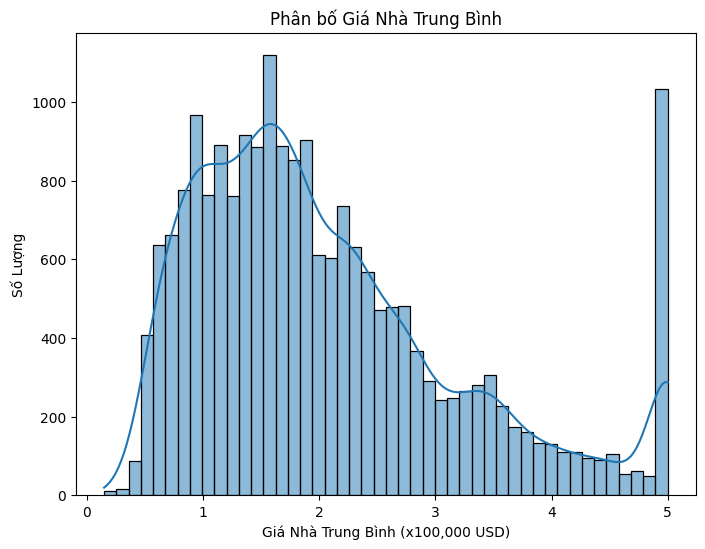

In [150]:
# Plot the distribution of the target variables
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Phân bố Giá Nhà Trung Bình')
plt.xlabel('Giá Nhà Trung Bình (x100,000 USD)')
plt.ylabel('Số Lượng')
plt.show()

Ta có thể nhận thấy
- Giá nhà trung bình có phân bố lệch về phía giá trị thấp, với một số ít các giá trị cao xuất hiện như ngoại lệ. Điều này có thể cho thấy sự phân bố không đồng đều của giá nhà tại các khu vực khác nhau trong California.

#### B4. Mối quan hệ giữa giá nhà và các biến độc lập

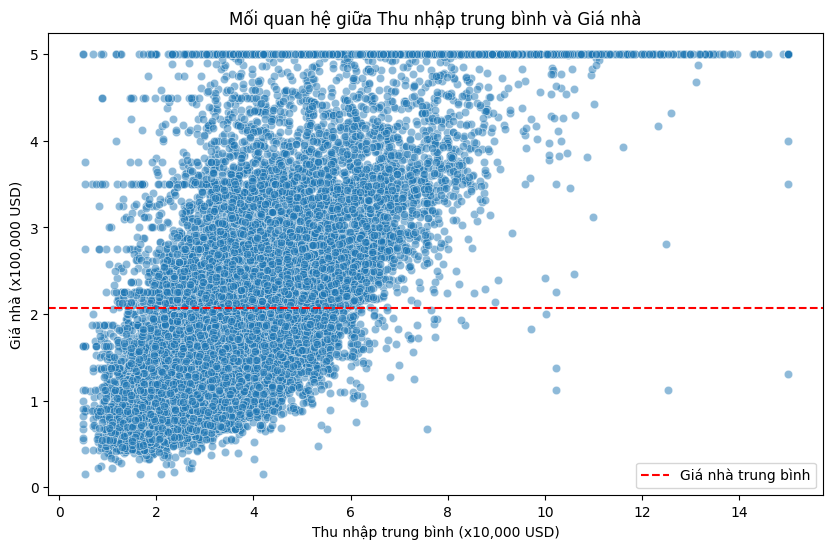

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5)
plt.title('Mối quan hệ giữa Thu nhập trung bình và Giá nhà')
plt.xlabel('Thu nhập trung bình (x10,000 USD)')
plt.ylabel('Giá nhà (x100,000 USD)')

# Add a horizontal line representing the average house value
plt.axhline(y=df['MedHouseVal'].mean(), color='r', linestyle='--', label='Giá nhà trung bình')
plt.legend()


plt.show()


- `MedInc` & `MedHousePrice` có một mối quan hệ tương quan dương mạnh mẽ giữa thu nhập trung bình và giá nhà, cho thấy rằng những khu vực có thu nhập trung bình cao thường có giá nhà cao hơn. Điều này phản ánh thực tế rằng khả năng chi trả của cư dân có ảnh hưởng lớn đến giá nhà.

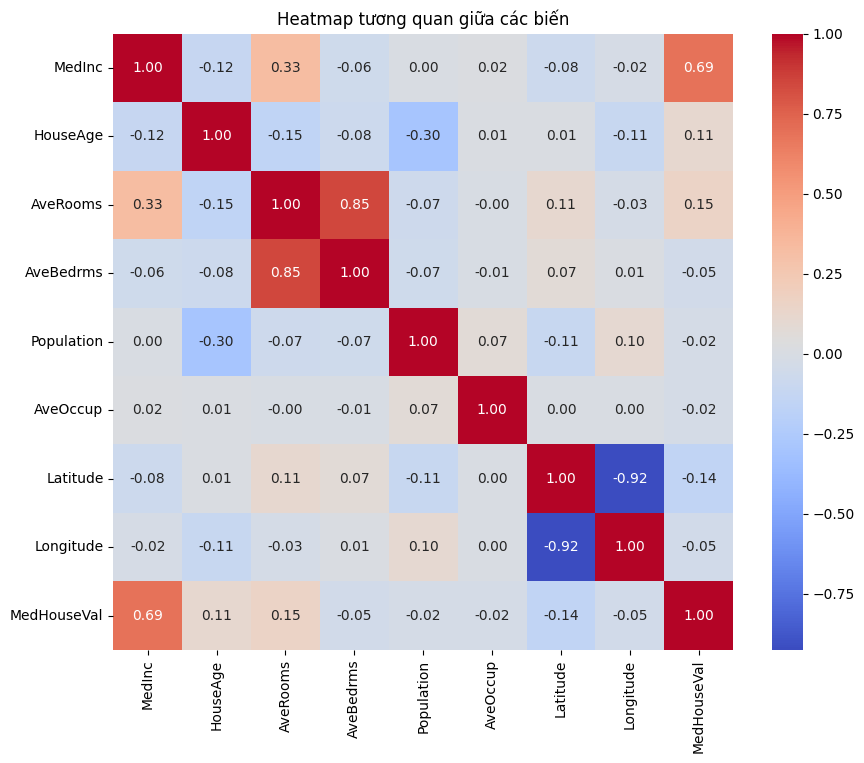

In [152]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap tương quan giữa các biến')
plt.show()

- `AveRooms` (số phòng trung bình mỗi hộ gia đình) có mối quan hệ tương quan dương với giá nhà, nhưng mối quan hệ này không mạnh bằng thu nhập trung bình. Điều này cho thấy các nhà có nhiều phòng hơn có thể có giá cao hơn, nhưng yếu tố này không phải là yếu tố duy nhất quyết định giá nhà.
- Các biến như `HouseAge`, `AveBedrms` và `Population` cũng có ảnh hưởng đến giá nhà nhưng ở mức độ khác nhau và không rõ ràng bằng mối quan hệ của thu nhập trung bình.
- Biểu đồ heatmap cho thấy mối tương quan mạnh giữa `MedHousePrice` với `MedInc`, điều này là quan trọng cho việc xây dựng các mô hình dự đoán trong tương lai. Mối quan hệ giữa các biến khác như `AveRooms`, `AveOccup`, và `Population` có tương quan với nhau nhưng ảnh hưởng ít rõ rệt hơn đến giá nhà.

#### B5. Kiểm tra phân bố của các biến độc lập

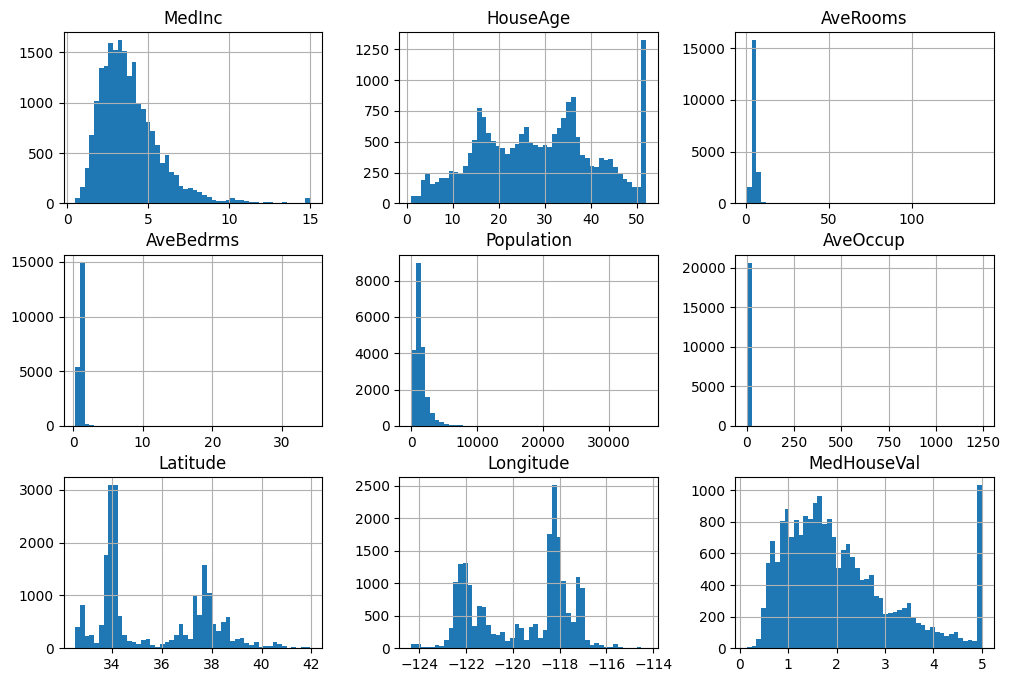

In [153]:
df.hist(bins=50, figsize=(12,8))
plt.show()

- Các biến độc lập có phân phối không đồng đều, với một số biến như `MedInc`, `AveRooms`, `AveBedrms`, `Population` có phân phối lệch phải, trong khi `HouseAge` có phân phối lệch trái. Điều này có thể ảnh hưởng đến việc xây dựng mô hình dự đoán giá nhà.

#### B6. Xem xét các outlier

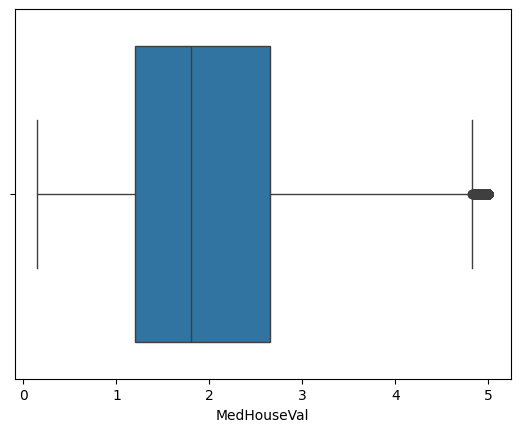

In [154]:
sns.boxplot(x=df['MedHouseVal'])
plt.show()

- Có một số outlier xuất hiện trong dữ liệu, nhưng số lượng không nhiều và không ảnh hưởng nhiều đến phân phối của dữ liệu.

## Yêu cầu 3 (3.5 đ)

Phân tích giá nhà theo các biến khác.

#### B1. Chuẩn bị dữ liệu


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop target variable and assign it to y
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### B2. Huấn luyện (Train) mô hình Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### B3. Dự đoán và đánh giá mô hình

In [157]:
# Predict the target variable
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Hệ số hồi quy:", model.coef_)
print("Sai số chuẩn (MSE):", mse)
print("Hệ số xác định (R²):", r2)

Hệ số hồi quy: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Sai số chuẩn (MSE): 0.555891598695244
Hệ số xác định (R²): 0.5757877060324511


##### Nhận xét:
- Mô hình Linear Regression cho kết quả tương đối tốt với R2 score khoảng 0.58, cho thấy mô hình có khả năng giải thích được khoảng 58% sự biến thiên của giá nhà dựa trên các biến đầu vào. Đây không phải là một kết quả rất tốt, bởi lý tưởng chúng ta mong muốn con số này cao hơn nhiều, gần với 1.

#### B4. Trực quan hoá
4.1 Biểu đồ giữa MedHouseVal và MedInc

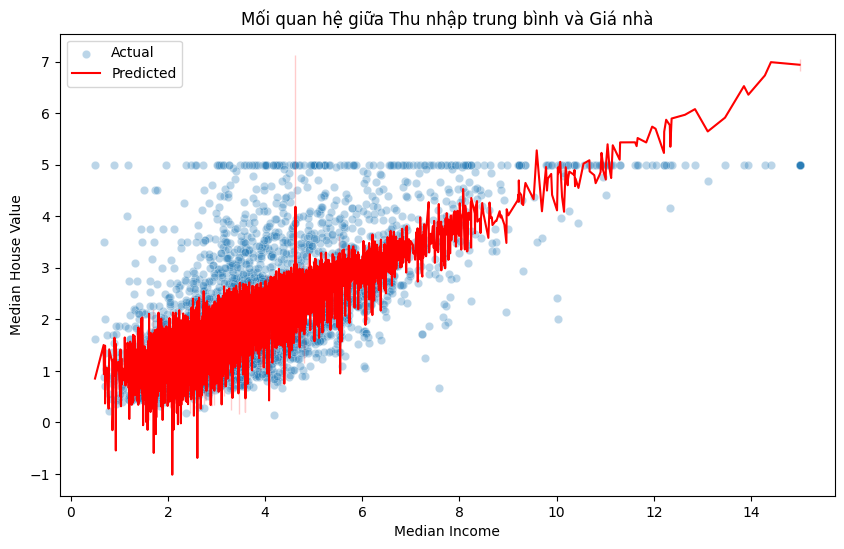

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['MedInc'], y=y_test, alpha=0.3, label='Actual')
sns.lineplot(x=X_test['MedInc'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa Thu nhập trung bình và Giá nhà')

plt.show()

- Biểu đồ cho thấy mối quan hệ tương quan dương giữa thu nhập trung bình và giá nhà, với giá nhà tăng theo thu nhập trung bình.
- Mối quan hệ này không phải là tuyến tính, với giá nhà tăng nhanh ở mức thu nhập thấp và chậm hơn ở mức thu nhập cao.

4.2 Biểu đồ giữa MedHouseVal và AveBedrms

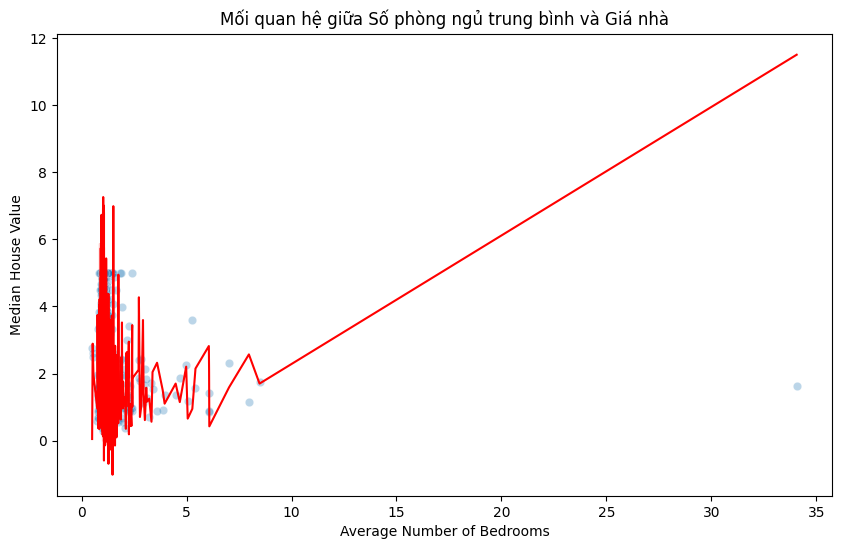

In [159]:
# MedHouseVal vs AveBedrms
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AveBedrms'], y=y_test, alpha=0.3)
sns.lineplot(x=X_test['AveBedrms'], y=y_pred, color='red')
plt.xlabel('Average Number of Bedrooms')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa Số phòng ngủ trung bình và Giá nhà')
plt.show()

- Biểu đồ cho thấy mối quan hệ tương quan dương giữa số phòng ngủ trung bình và giá nhà, với giá nhà tăng theo số phòng ngủ trung bình.
- Mối quan hệ này không phải là tuyến tính, với giá nhà tăng nhanh ở mức số phòng ngủ thấp và chậm hơn ở mức số phòng ngủ cao.
- Có một số outlier xuất hiện ở mức số phòng ngủ cao, nhưng số lượng không nhiều và không ảnh hưởng nhiều đến phân phối của dữ liệu.

4.3 Biểu đồ giữa MedHouseVal và HouseAge

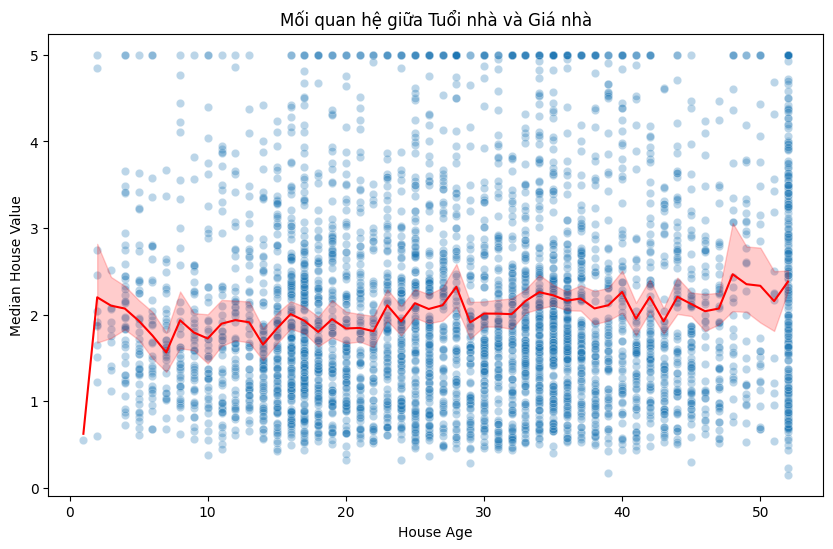

In [160]:
# MedHouseVal vs HouseAge
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['HouseAge'], y=y_test, alpha=0.3)
sns.lineplot(x=X_test['HouseAge'], y=y_pred, color='red')
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa Tuổi nhà và Giá nhà')
plt.show()

4.4 Biểu đồ giữa MedHouseVal và Population

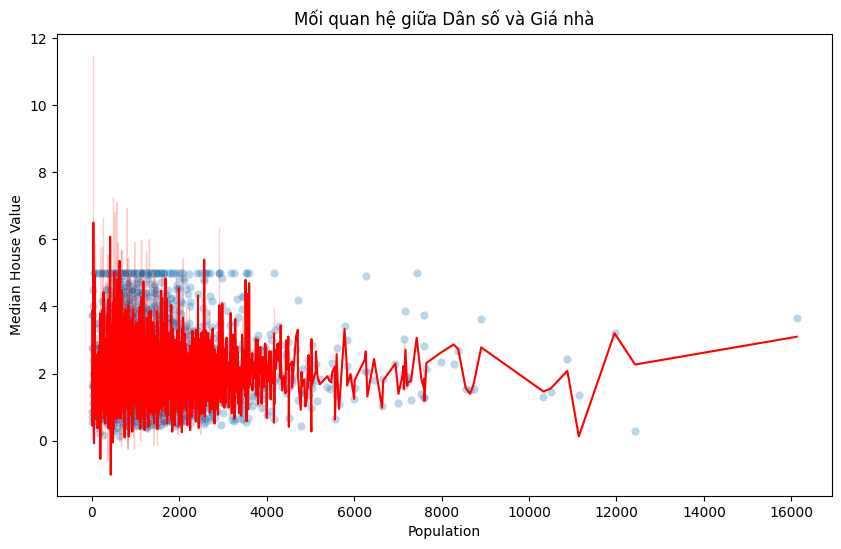

In [161]:
# MedHouseVal vs Population
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Population'], y=y_test, alpha=0.3)
sns.lineplot(x=X_test['Population'], y=y_pred, color='red')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa Dân số và Giá nhà')
plt.show()

- Biểu đồ cho thấy mối quan hệ không rõ ràng giữa giá nhà và số dân cư, với giá nhà không có xu hướng tăng hoặc giảm theo số dân cư.

4.5 Biểu đồ giữa MedHouseVal và AveOccup

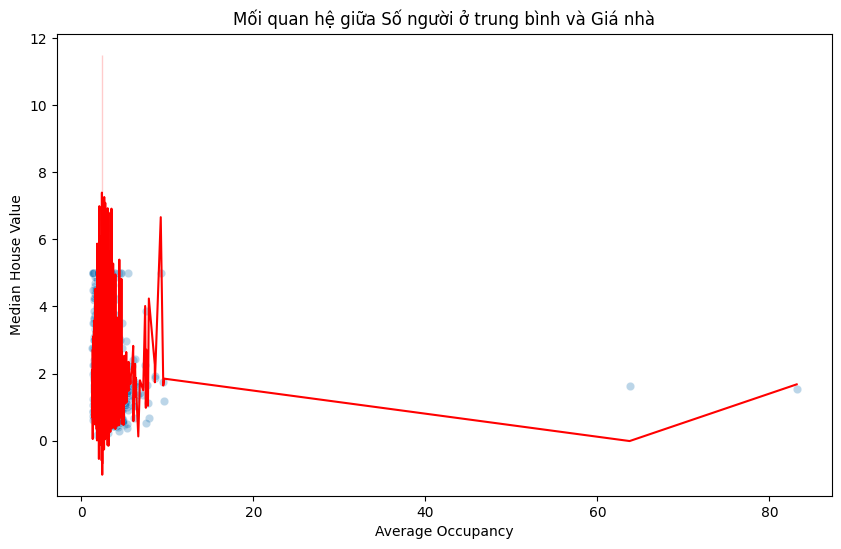

In [162]:
# MedHouseVal vs AveOccup
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AveOccup'], y=y_test, alpha=0.3)
sns.lineplot(x=X_test['AveOccup'], y=y_pred, color='red')
plt.xlabel('Average Occupancy')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa Số người ở trung bình và Giá nhà')
plt.show()

- Biểu đồ cho thấy mối quan hệ không rõ ràng giữa giá nhà và số người trên mỗi phòng, với giá nhà không có xu hướng tăng hoặc giảm theo số người trên mỗi phòng.

4.6 Biểu đồ giữa MedHouseVal và AveRooms

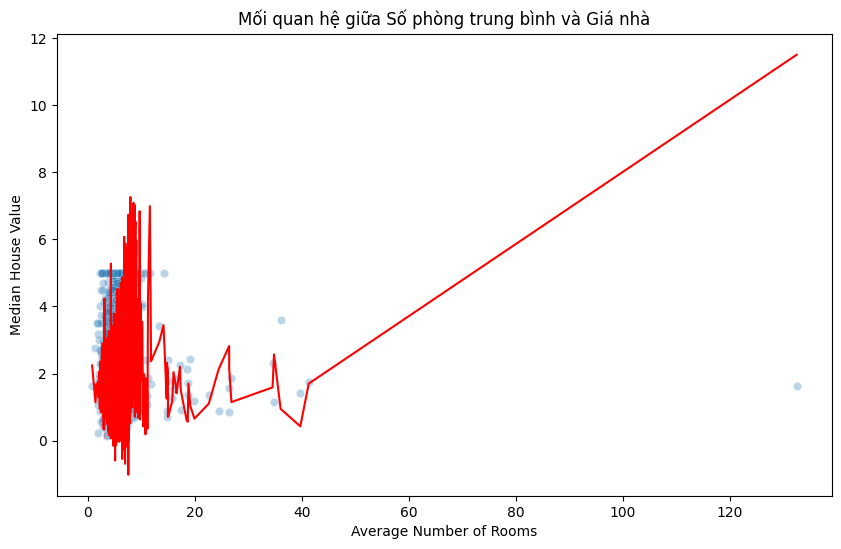

In [163]:
# MedHouseVal vs AveRooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['AveRooms'], y=y_test, alpha=0.3)
sns.lineplot(x=X_test['AveRooms'], y=y_pred, color='red')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa Số phòng trung bình và Giá nhà')
plt.show()

Tương tự như AveBedrms, biểu đồ cho thấy mối quan hệ tương quan dương giữa số phòng trung bình mỗi hộ gia đình và giá nhà, với giá nhà tăng theo số phòng trung bình mỗi hộ gia đình.

4.7 Biểu đồ giữa MedHouseVal và toạ độ địa lý

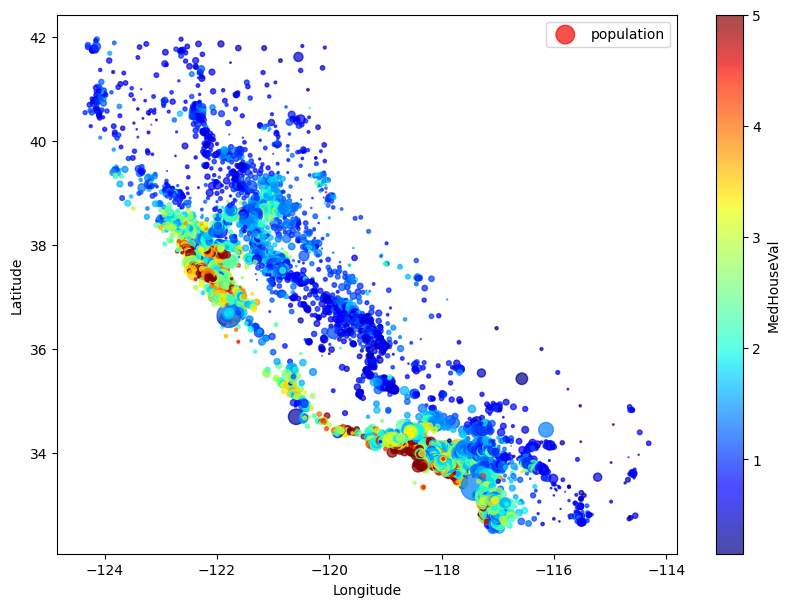

In [164]:
# MedHouseVal vs Lat, Long
df.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Population']/100, label="population", alpha=0.7)
plt.show()

- Biểu đồ cho thấy giá nhà có sự biến thiên lớn tại các khu vực khác nhau, với một số khu vực có giá nhà cao hơn so với các khu vực khác.
- Các khu vực gần biển có giá nhà cao hơn so với các khu vực ở xa biển.

## Yêu cầu 4 (3.5 đ)

1. Tìm hiểu kĩ thuật *giảm chiều dữ liệu* (dimensionality reduction) **PCA** (Principal Component Analysis).

2. Dùng PCA để rút gọn các đặc trưng (các biến còn lại trừ giá nhà) thành 2 chiều (2 biến mới).

3. Phân tích lại giá nhà theo 2 biến mới này và so sánh kết quả với Yêu cầu 3.

#### 1. Tìm hiểu ki thuật PCA

Nguồn tài liệu tham khảo: https://www.datacamp.com/tutorial/pca-analysis-r

Là một kỹ thuật giảm chiều dữ liệu, PCA giúp chúng ta giảm số chiều của dữ liệu mà không mất mất nhiều thông tin. PCA hoạt động bằng cách tìm ra các trục mới (các thành phần chính) sao cho phương sai của dữ liệu trên các trục này là lớn nhất. Các trục này được sắp xếp theo độ giảm dần của phương sai, với trục đầu tiên chứa phương sai lớn nhất, trục thứ hai chứa phương sai lớn thứ hai, và cứ tiếp tục như vậy.

##### Các bước thực hiện PCA:
1. Chuẩn hóa dữ liệu: Đầu tiên, chúng ta cần chuẩn hóa dữ liệu để các biến có cùng đơn vị đo lường.
2. Tính ma trận hiệp phương sai: Sau đó, chúng ta tính ma trận hiệp phương sai của dữ liệu.
3. Tính các thành phần chính: Cuối cùng, chúng ta tính các thành phần chính của dữ liệu bằng cách sử dụng phân tích giá trị riêng (eigenvalue decomposition) hoặc phân tích vector riêng (eigenvector decomposition).
4. Chọn số thành phần chính: Chúng ta chọn số thành phần chính sao cho tỷ lệ phương sai giữa các thành phần chính là lớn nhất.
5. Chuyển đổi dữ liệu: Cuối cùng, chúng ta chuyển đổi dữ liệu ban đầu sang các thành phần chính mới.

##### Các ứng dụng của PCA:
- Giảm chiều dữ liệu: PCA giúp giảm số chiều của dữ liệu mà không mất mất nhiều thông tin.
- Phân tích dữ liệu: PCA giúp chúng ta hiểu rõ hơn về cấu trúc của dữ liệu và mối quan hệ giữa các biến.
- Trực quan hóa dữ liệu: PCA giúp chúng ta trực quan hóa dữ liệu nhiều chiều lên không gian 2D hoặc 3D để dễ dàng quan sát và phân tích.
- Giảm nhiễu, cải thiện hiệu suất mô hình: PCA giúp giảm nhiễu trong dữ liệu bằng cách giữ lại các thành phần chính quan trọng và loại bỏ các thành phần chính không quan trọng.

#### 2. Dùng PCA để rút gọn các đặc trưng (các biến còn lại trừ giá nhà) thành 2 chiều (2 biến mới).

B1. Tải dữ liệu

B2. Chuẩn hoá dữ liệu (Đã làm trước đó tại bài B3. Bước 1)

B3. Áp dụng PCA để giảm chiều dư liệu xuống còn 2

In [165]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

B4. Kiểm tra kết quả

In [169]:
print("Phương sai được giải thích bởi 2 thành phần chính:")
print(pca.explained_variance_ratio_)
print("Tổng phương sai được giải thích:", np.sum(pca.explained_variance_ratio_))

Phương sai được giải thích bởi 2 thành phần chính:
[0.25313826 0.23403182]
Tổng phương sai được giải thích: 0.4871700779540272


#### 3. Phân tích lại giá nhà theo 2 biến mới này và so sánh kết quả với Yêu cầu 3.

In [168]:
# Train a linear regression model using the PCA transformed data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print("Hệ số hồi quy (PCA):", model_pca.coef_)
print("Sai số chuẩn (MSE) (PCA):", mse_pca)
print("Hệ số xác định (R²) (PCA):", r2_pca)

Hệ số hồi quy (PCA): [0.03160408 0.13776418]
Sai số chuẩn (MSE) (PCA): 1.2945562711590004
Hệ số xác định (R²) (PCA): 0.01209752630295624


Nhận xét:
- MSE đầy đủ ~0.58 thấp hơn cho mô hình đầy đủ cho thấy mô hình này có độ chính xác cao hơn trong dự đoán giá nhà so với mô hình PCA. Điều này cho thấy việc loại bỏ một số thông tin khi giảm chiều dữ liệu (qua PCA) có thể đã làm mất đi một số yếu tố quan trọng ảnh hưởng đến giá nhà, dẫn đến việc giảm chất lượng dự đoán.

- R2 thấp của mô hình PCA (chỉ khoảng 1.2%) chỉ ra rằng mô hình này chỉ giải thích được một phần rất nhỏ biến động trong giá nhà. So với R2 cao hơn nhiều (khoảng 57.58%) của mô hình đầy đủ cho thấy mô hình đầy đủ nắm bắt được nhiều yếu tố ảnh hưởng đến giá nhà hơn.


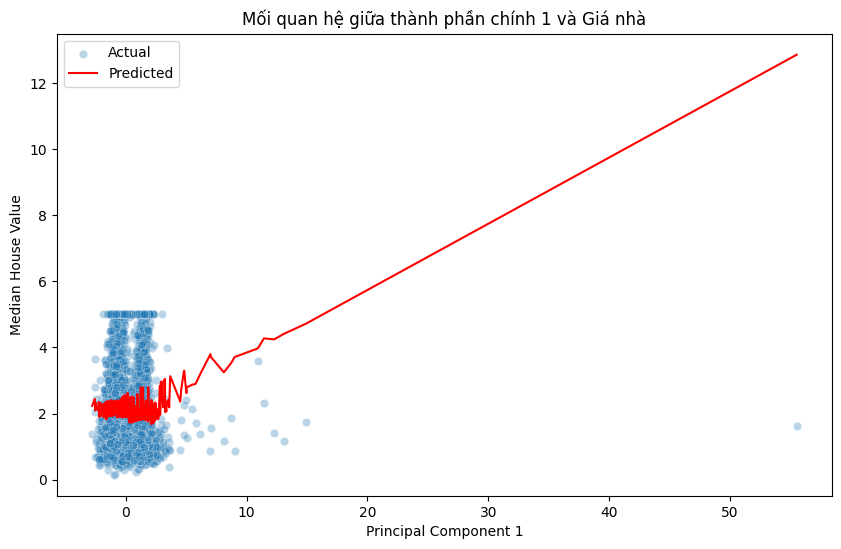

In [170]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=y_test, alpha=0.3, label='Actual')
sns.lineplot(x=X_test_pca[:, 0], y=y_pred_pca, color='red', label='Predicted')
plt.xlabel('Principal Component 1')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa thành phần chính 1 và Giá nhà')
plt.show()

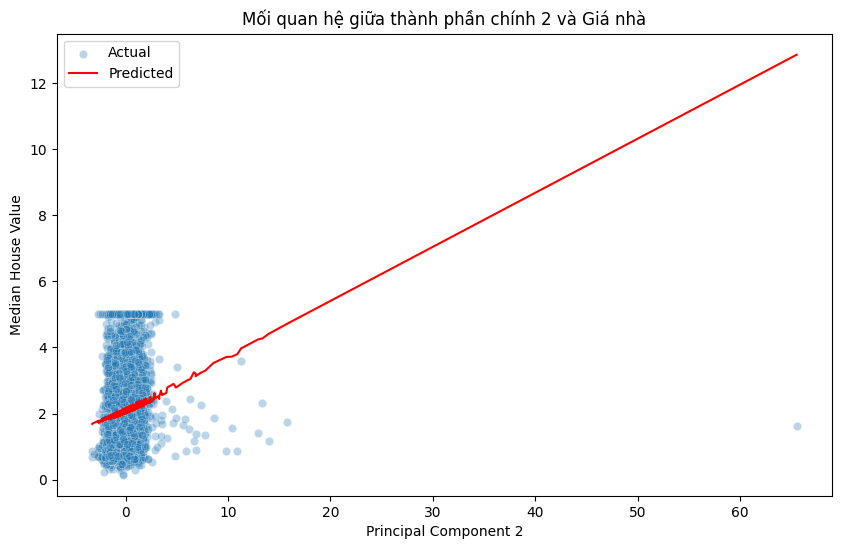

In [171]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 1], y=y_test, alpha=0.3, label='Actual')
sns.lineplot(x=X_test_pca[:, 1], y=y_pred_pca, color='red', label='Predicted')
plt.xlabel('Principal Component 2')
plt.ylabel('Median House Value')
plt.title('Mối quan hệ giữa thành phần chính 2 và Giá nhà')
plt.show()

Nhận xét: 
- Mô hình PCA cho kết quả dự đoán không tốt bằng mô hình đầy đủ, với R2 score thấp hơn (khoảng 1.2% so với 57.58%). Điều này cho thấy mô hình PCA không thể giải thích được nhiều biến thiên trong giá nhà so với mô hình đầy đủ.
- Mặc dù mô hình PCA giúp giảm chiều dữ liệu xuống còn 2 chiều, nhưng nó đã làm mất một số thông tin quan trọng ảnh hưởng đến giá nhà, dẫn đến việc giảm chất lượng dự đoán.